## Exploratory Data Analysis. 

Due: Wednesday, November 11, 2020 13:30 hrs

---

Instructions
==========
- First thing first, rename the file. Let's say your rollno is BSEF17M501, rename the file as BSEF17M501-DataScience-Midterm.ipynb


## Introduction

This exercise will check your data exploratory skills.


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting
* [Seaborn](https://seaborn.pydata.org/), for plotting


---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

It is said that the CO2 emissions in the world has increased during the last decades. We are interested in doing a exploratory data analysis to find that if the emissions has increased in various regions like Africa/Latin America/Asia and Europe/NorthAmerica.

#### Problem 1(a)

First load the `metadata-countries` sheet from excel file `API_EN.ATM.CO2E.PC_DS2_en_excel_v2.xls` into a pandas DataFrame and name this data set as `countries`.

In [2]:
#your code here
countries = pd.read_excel('API_EN.ATM.CO2E.PC_DS2_en_excel_v2.xls', sheet_name='Metadata - Countries')
countries

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Upper middle income,"April 2013 database update: Based on IMF data,...",Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,The base year has changed to 2000. Price valua...,Andorra
...,...,...,...,...,...
258,WSM,East Asia & Pacific,Lower middle income,Fiscal year ends on June 30; reporting period ...,Samoa
259,YEM,Middle East & North Africa,Lower middle income,Based on official government statistics and In...,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,The new base year is 2010. National accounts d...,Zambia


Clean the countries dataframe to keep only the country and region data field as shown below:
<img src="Fig1.PNG" />

In [3]:
#your code here
countries = countries [['Region', 'TableName']]
countries

,Region,TableName
0,Latin America & Caribbean,Aruba
1,South Asia,Afghanistan
2,Sub-Saharan Africa,Angola
3,Europe & Central Asia,Albania
4,Europe & Central Asia,Andorra
...,...,...
258,East Asia & Pacific,Samoa
259,Middle East & North Africa,"Yemen, Rep."
260,Sub-Saharan Africa,South Africa
261,Sub-Saharan Africa,Zambia


Convert to the following format
<img src="Fig2.PNG" />

In [4]:
#your code here
countries = countries.rename(columns={'TableName': 'Country'})
countries.set_index('Country')

,Region
Country,
Aruba,Latin America & Caribbean
Afghanistan,South Asia
Angola,Sub-Saharan Africa
Albania,Europe & Central Asia
Andorra,Europe & Central Asia
...,...
Samoa,East Asia & Pacific
"Yemen, Rep.",Middle East & North Africa
South Africa,Sub-Saharan Africa


List the unique regions

In [5]:
#your code here
regions = set()
regions.update([n for n in countries['Region'] if n == n])
regions

{'East Asia & Pacific',
 'Europe & Central Asia',
 'Latin America & Caribbean',
 'Middle East & North Africa',
 'North America',
 'South Asia',
 'Sub-Saharan Africa'}

From the earlier excel file, read `Data` datasheet in pandas DataFrame and name this data set as `emissions`.

In [6]:
#your code here
emissions = pd.read_excel('API_EN.ATM.CO2E.PC_DS2_en_excel_v2.xls', sheet_name='Data')
emissions

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,Last Updated Date,2016-10-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000000,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.0,2015.0,2016.0
3,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,25.613715,24.750133,24.876706,24.182702,23.922412,12.713613,8.515395,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.350868,6.296125,6.049173,6.124770,5.968685,6.195194,6.473848,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.703403,0.507631,0.728004,0.537606,0.658012,0.699574,...,0.966383,1.000747,1.070024,0.993225,0.811478,0.735086,0.992680,NaN,NaN,NaN
263,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.629718,5.694383,5.729712,5.799844,6.170936,6.467359,...,9.618665,10.093949,10.061046,9.337838,9.215097,9.016499,8.859169,NaN,NaN,NaN
264,"Congo, Dem. Rep.",COD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.152228,0.150782,0.135559,0.139446,0.116926,0.142290,...,0.028927,0.029605,0.026937,0.030197,0.036246,0.036414,0.038311,NaN,NaN,NaN
265,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,0.950434,1.100197,...,0.139614,0.166369,0.187044,0.194713,0.204524,0.235347,0.250863,NaN,NaN,NaN


Convert to the following form:
<img src="Fig3.PNG" />

In [7]:
#your code here
emissions.columns = emissions.iloc[2,:]

emissions.columns = list([str(n).replace('.0','') for n in emissions.columns])

emissions = emissions.drop(emissions.index[[0,2]])

emissions = emissions.set_index('Country Name')

emissions = emissions.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
emissions

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.613715,24.750133,24.876706,24.182702,23.922412,12.713613,8.515395,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.350868,6.296125,6.049173,6.124770,5.968685,6.195194,6.473848,NaN,NaN,NaN
Afghanistan,0.046068,0.053615,0.073781,0.074251,0.086317,0.101499,0.107674,0.123782,0.115547,0.086863,...,0.087858,0.158962,0.249074,0.302936,0.425262,0.688084,0.693183,NaN,NaN,NaN
Angola,0.104357,0.084718,0.216025,0.206877,0.216174,0.206089,0.265164,0.166659,0.275655,0.451126,...,1.311096,1.295687,1.354389,1.369339,1.382752,1.472255,1.384496,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yemen, Rep.",0.703403,0.507631,0.728004,0.537606,0.658012,0.699574,0.605767,0.524197,1.961621,0.773758,...,0.966383,1.000747,1.070024,0.993225,0.811478,0.735086,0.992680,NaN,NaN,NaN
South Africa,5.629718,5.694383,5.729712,5.799844,6.170936,6.467359,6.332753,6.465648,6.527672,6.629522,...,9.618665,10.093949,10.061046,9.337838,9.215097,9.016499,8.859169,NaN,NaN,NaN
"Congo, Dem. Rep.",0.152228,0.150782,0.135559,0.139446,0.116926,0.142290,0.134675,0.124706,0.178181,0.187695,...,0.028927,0.029605,0.026937,0.030197,0.036246,0.036414,0.038311,NaN,NaN,NaN


Transform the data set to have `years` as the rows and `countries` as the columns. Show the head of this data set when it is loaded as:
<img src="Fig4.PNG" />

In [8]:
#your code here
emissions = emissions.transpose()
emissions = emissions.drop(emissions.columns[0], axis=1)
emissions

Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
1960,NaN,NaN,0.046068,0.104357,1.258195,0.643654,0.118786,2.367473,NaN,NaN,...,0.215631,NaN,NaN,3.092462,0.135009,0.703403,5.629718,0.152228,NaN,NaN
1961,NaN,NaN,0.053615,0.084718,1.374186,0.685240,0.108937,2.442616,NaN,NaN,...,0.225435,NaN,NaN,3.062124,0.163529,0.507631,5.694383,0.150782,NaN,NaN
1962,NaN,NaN,0.073781,0.216025,1.439956,0.760996,0.163355,2.522392,NaN,NaN,...,0.258760,0.594888,NaN,3.134694,0.158352,0.728004,5.729712,0.135559,NaN,NaN
1963,NaN,NaN,0.074251,0.206877,1.181681,0.875116,0.175712,2.316356,NaN,NaN,...,0.247579,0.471728,NaN,3.239593,0.184019,0.537606,5.799844,0.139446,NaN,NaN
1964,NaN,NaN,0.086317,0.216174,1.111742,0.999349,0.132651,2.538380,NaN,NaN,...,0.314058,0.864247,NaN,3.356407,0.208092,0.658012,6.170936,0.116926,0.950434,1.045374
1965,NaN,NaN,0.101499,0.206089,1.166099,1.166167,0.146370,2.641714,NaN,NaN,...,0.343354,0.641714,NaN,3.435528,0.230869,0.699574,6.467359,0.142290,1.100197,1.179176
1966,NaN,NaN,0.107674,0.265164,1.333055,1.273495,0.159359,2.792654,NaN,NaN,...,0.490532,1.007813,NaN,3.531829,0.196416,0.605767,6.332753,0.134675,0.953158,1.323656
1967,NaN,NaN,0.123782,0.166659,1.363746,1.332809,5.336737,2.858163,NaN,NaN,...,0.574906,1.074161,NaN,3.572234,0.191283,0.524197,6.465648,0.124706,1.263628,1.122961
1968,NaN,NaN,0.115547,0.275655,1.519551,1.547333,6.708216,2.969855,NaN,NaN,...,0.578197,0.772775,NaN,3.680281,0.213348,1.961621,6.527672,0.178181,1.167432,1.309827
1969,NaN,NaN,0.086863,0.451126,1.558968,1.793680,99.840439,3.275850,NaN,NaN,...,0.648285,0.530546,NaN,3.820604,0.208767,0.773758,6.629522,0.187695,1.056391,1.340452


#### Problem 1(b)

Plot a histogram to show the distribution of `emissions per capita` across all countries in the world for any given year (e.g. 2010).

C:\Users\hamza\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hamza\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Emissions Per Capita')

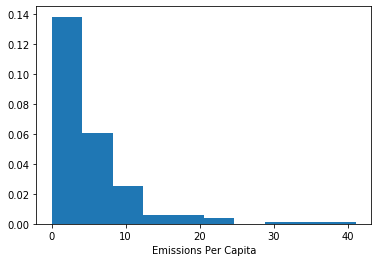

In [9]:
#your code here
plt.hist(emissions.loc['2010',:] , density=True)
plt.xlabel('Emissions Per Capita')

#### Problem 1(c)

Next, we want to merge the data from two dataframes  `countries` and `emissions` for any given year. Write a function that does the following for the year 2012 for example:
<img src="Fig5.PNG" />

#### Problem 1(d) 

Use exploratory data analysis tools such as boxplots to explore the distribution of the CO2 emissions per person by region data set from 1(c) for a given year. Describe how these change from 1960 to 2010?

**Hint**: Use a `for` loop to consider multiple years like for decade use 10 as a step.  For example like for year 1960
<img src="Fig6.PNG" />

In [10]:
#your code here

#### Problem 1(e) 

Read the `indicator gapminder gdp_per_capita_ppp.xlsx` data in `income' dataframe.

In [11]:
#your code here
income = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx')
income

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Zimbabwe,869.0,870.0,871.0,872.0,873.0,874.0,875.0,876.0,877.0,...,1629.0,1568.0,1286.0,1352.0,1484.0,1626.0,1750.0,1773.0,1773.0,1801.0
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,South Sudan,507.0,507.0,507.0,507.0,508.0,508.0,508.0,508.0,508.0,...,3455.0,3756.0,3776.0,3799.0,3838.0,3505.0,1810.0,1965.0,2574.0,3047.0
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Read the `indicator life_expectancy_at_birth.xlsx` data in 'Life_exp' dataframe.

In [15]:
#your code here
Life_exp = pd.read_excel('indicator life_expectancy_at_birth.xlsx')
Life_exp

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10
257,Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,46.4,47.3,48.0,49.1,51.6,54.2,55.7,57.0,59.3,61.69
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Write a function similar to written in 1(c), that merges income and Life_exp dataframes, such that if you pass a year as argument, it returns

Country, Regions, CO2 emissions, income per capita, life expectency as follows:
<img src="Fig7.PNG" />

In [17]:
#your code here
def MergeF(year):
    
    emp = emissions.transpose()[[year]]
    
    emp.rename({'Country Name': 'Country'})
    
    countries_part = countries['Region']
    
    df = pd.merge(emp, countries_part, left_on = emp.index, right_on = countries_part.index)
    
    df = df.rename(columns={'key_0': 'Country', year:'CO2_Emission'})
    
    return df.set_index('Country')

MergeF('2010')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

#### Problem 1(f) 

Plot the region wise mean Income per capita for a given year.

In [14]:
#your code here